In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [303]:
data_path = 'Untitled spreadsheet - Sheet1 (6).csv'
dataset = pd.read_csv(data_path)

In [304]:
#di hapus untuk menghindari kesalahan perhitungan karena akan ikut terhitung ya..
#misal kalau tidak di hapus juga bisa tapi kali ini saya hapus dulu asalkan jawabannya sama
dataset.drop(['IDENTITAS'], axis = 1,)

,P,Q,R,S
0,6,86,81,3
1,55,36,75,23
2,58,13,43,9
3,71,97,48,42
4,9,34,83,26
5,36,21,99,62
6,94,13,18,40
7,32,2,2,8
8,61,47,36,42
9,88,47,59,78


In [305]:
#mengecek berapa jumlah nilai dari data yang kosong
dataset.isna().sum()

IDENTITAS    0
P            0
Q            0
R            0
S            0
dtype: int64

In [306]:
#memilih kolom ke 1 sampai ke 5(p,q,r,s) dan identitas adalah kolom ke 0 jadi jangan dimasukan ya
X = dataset.iloc[: , 1:5 ].values

In [307]:
print(X)

[[  6  86  81   3]
 [ 55  36  75  23]
 [ 58  13  43   9]
 [ 71  97  48  42]
 [  9  34  83  26]
 [ 36  21  99  62]
 [ 94  13  18  40]
 [ 32   2   2   8]
 [ 61  47  36  42]
 [ 88  47  59  78]
 [ 95  16  82  90]
 [ 11  79  24  61]
 [ 38  55  11   7]
 [ 81  62  16  13]
 [ 84  89  26  71]
 [ 77  38  80  49]
 [ 64  25  98  44]
 [ 98  56  89  29]
 [ 59  63  63  45]
 [ 62  49  27  25]
 [ 66  41   7  33]
 [ 62   5  74  57]
 [  2   8  62  79]
 [ 97  12  85  65]
 [ 79  55   2  91]
 [ 89  14  50  99]
 [  5  32  59  16]
 [ 97  33  56  33]
 [ 33  69  46  40]
 [  8  53  84  57]
 [ 79   7  46  59]
 [ 94  62   7  64]
 [ 92  84  34  52]
 [  6  81  83  92]
 [ 21  72  82  91]
 [ 40   0  12  79]
 [ 51  55  72  51]
 [  2  39  37  82]
 [ 99  37  98   7]
 [ 60  70  12  20]
 [ 82  87   2  17]
 [ 51  65  12  39]
 [ 97  12  79  66]
 [ 53  95  55   9]
 [ 23  53  41  54]
 [ 89  55  76  40]
 [100  23  13   8]
 [ 25  36  96  14]
 [ 60  61  33  34]
 [  1  98  14  67]]


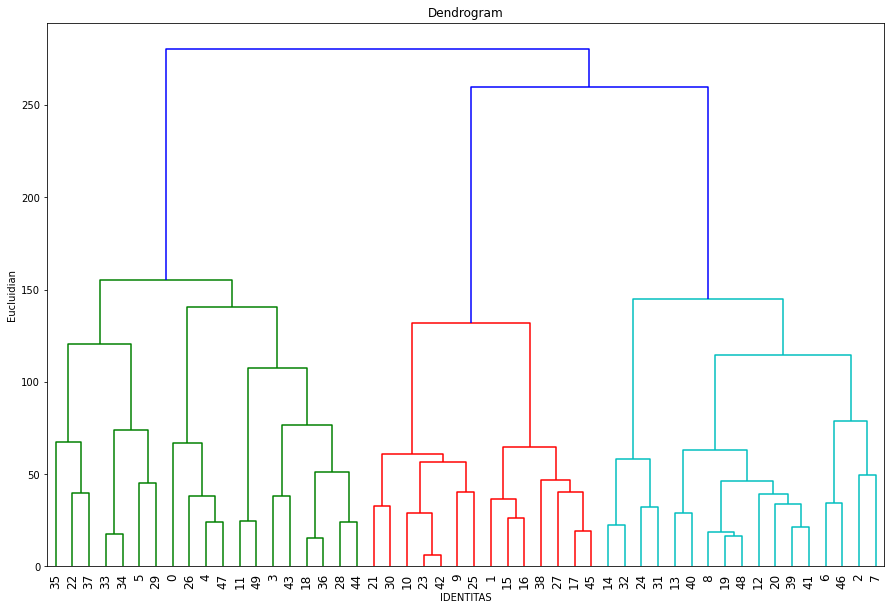

In [308]:
plt.figure(figsize=(15,10))
dendrogram = dendrogram(linkage(X,method='ward'),leaf_font_size=12)
plt.title('Dendrogram')
plt.xlabel('IDENTITAS')
plt.ylabel('Eucluidian')
plt.show()

In [309]:
AHC = AgglomerativeClustering(n_clusters=3 , affinity='euclidean' , linkage='ward')
y_ahc = AHC.fit_predict(X)

In [310]:
y_ahc

array([0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2,
       0, 2, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0,
       0, 2, 1, 0, 1, 0])

In [311]:
#metode euclidean dan ward. dengan range 2 sampai 50
for k in range(2,50):
  cluster = AgglomerativeClustering(n_clusters = k, affinity='euclidean' , linkage='ward')
  cluster.fit_predict(X)
  print (k, metrics.calinski_harabasz_score(X,cluster.labels_))
  #berdasarkan hasil matrix calinski_harabasz_score skor tertinggi pada pusat claster 3 yaitu 17.184868170570333

2 14.137910686167187
3 17.184868170570333
4 14.847997378555776
5 13.898245038432059
6 13.7632378772893
7 13.926144217517031
8 14.138091281862746
9 14.583047369402076
10 15.180166419743523
11 14.803265460759276
12 14.591874582644751
13 14.476560643056677
14 14.276501715963063
15 14.229380649732054
16 14.245343398989538
17 14.32660281169112
18 14.476626016334583
19 14.637113288702848
20 14.86400612270211
21 14.943881574869847
22 15.071407270833403
23 15.149670602333462
24 15.311223502276748
25 15.544932834388788
26 15.567466954378336
27 15.674225552824533
28 15.879086710687217
29 16.139830644635992
30 16.480840585012466
31 16.99559297228633
32 17.544410851260682
33 18.038745576637904
34 18.655773861632344
35 19.42791831626267
36 20.40002486714128
37 21.12477710213655
38 22.174973164589908
39 23.00301261687967
40 23.704936226640882
41 24.686238151152857
42 26.263129948438984
43 28.139464003056606
44 30.613681890510883
45 32.71724613826285
46 35.85456322287199
47 41.15540259120896
48 52.12